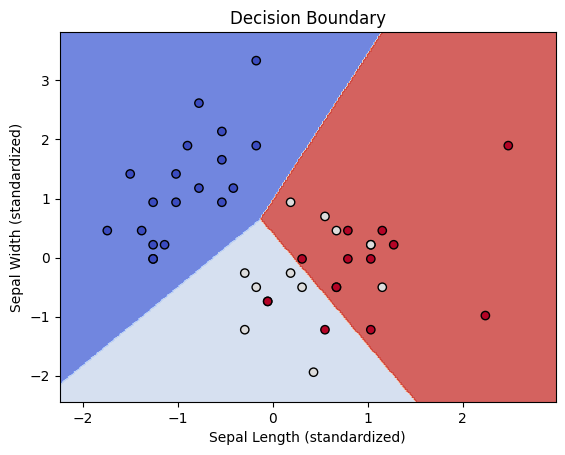

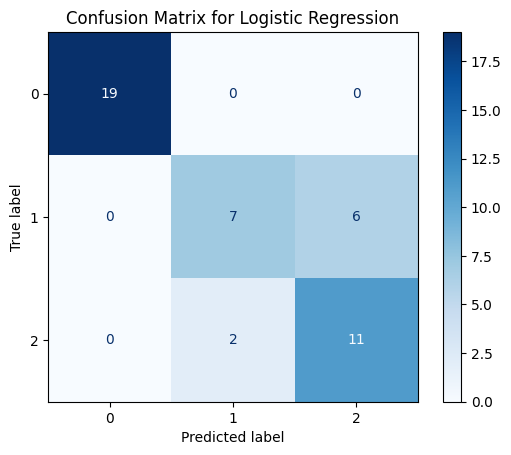

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

import numpy as np

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict and visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title('Decision Boundary')
    plt.show()

# Logistic Regression Example (Updated Confusion Matrix Code)
plot_decision_boundary(X_test, y_test, logreg)

# Confusion matrix display
cm = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


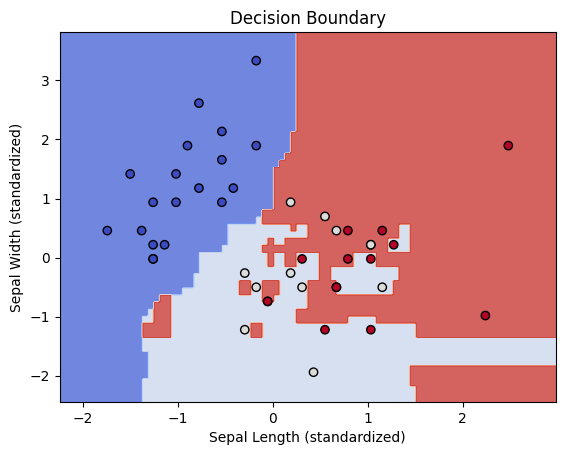

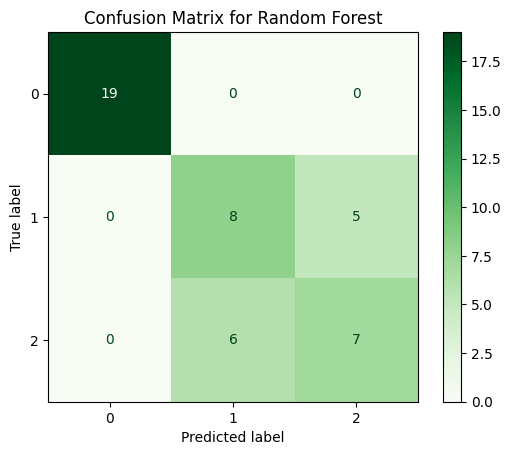

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Random Forest Example (Updated Confusion Matrix Code)
plot_decision_boundary(X_test, y_test, rf)

# Confusion matrix display
cm = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Random Forest')
plt.show()



/data/md/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:46:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.00


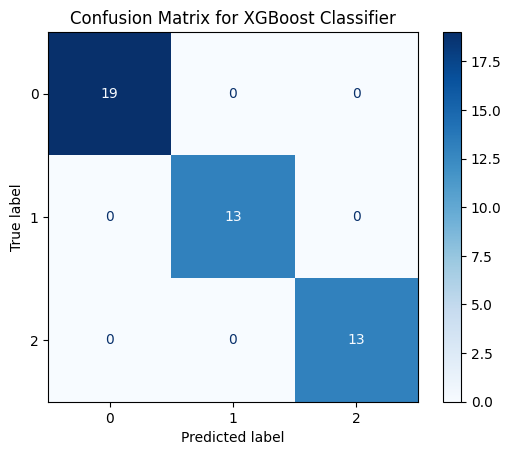

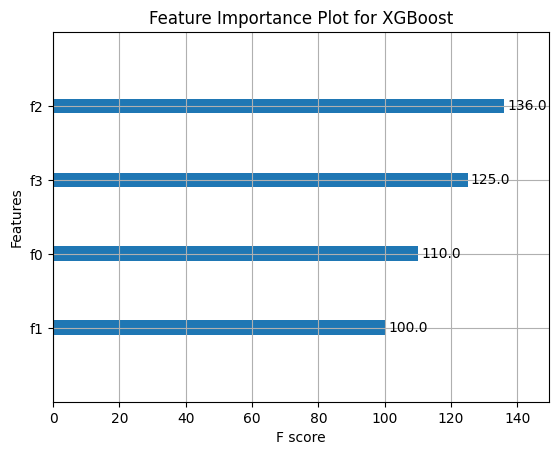

In [3]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all features
y = iris.target  # Target classes

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective="multi:softprob", num_class=3, use_label_encoder=False)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# Feature Importance
xgb.plot_importance(xgb_clf)
plt.title('Feature Importance Plot for XGBoost')
plt.show()


Accuracy: 0.69


/data/md/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:46:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


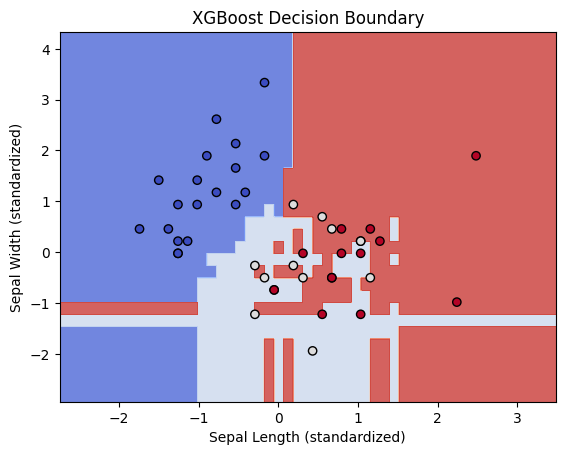

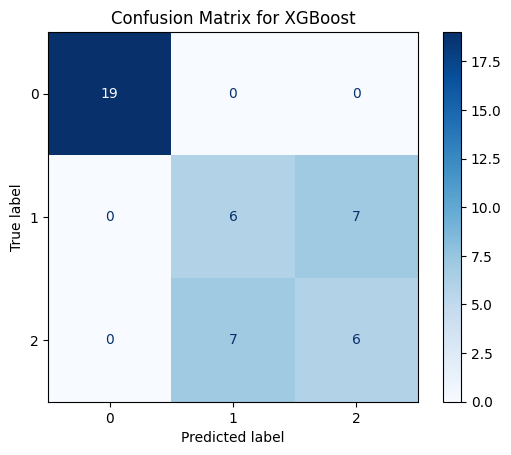

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Load the iris dataset and use only two features for 2D visualization
iris = load_iris()
X = iris.data[:, :2]  # Only use sepal length and sepal width for visualization
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an XGBoost classifier with two features
xgb_clf = XGBClassifier(objective="multi:softprob", num_class=3, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the contour plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title('XGBoost Decision Boundary')
    plt.show()

# Visualize decision boundary
plot_decision_boundary(X_test, y_test, xgb_clf)

# Confusion matrix display
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost')
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 2
[LightGBM] [Info] Start training from score -1.219973
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Info] Start training from score -1.043042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

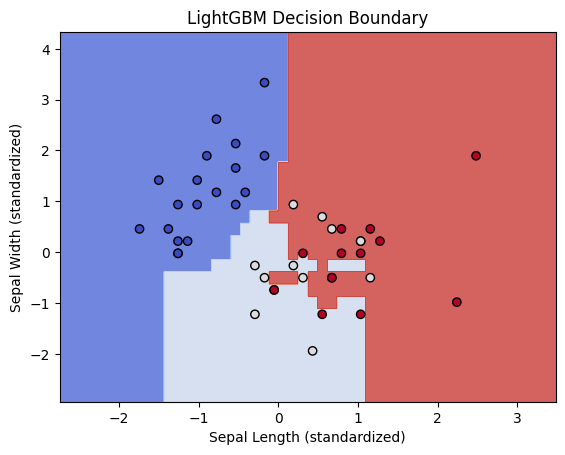

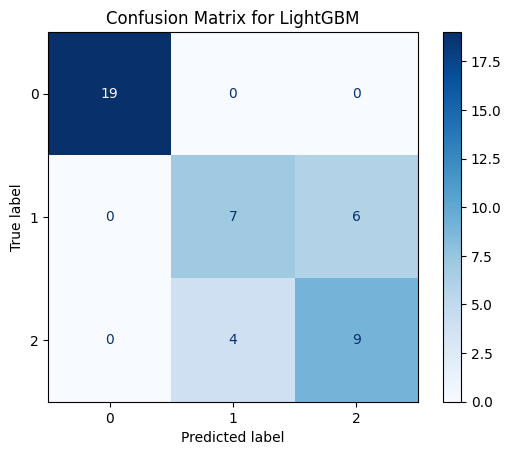

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Load the iris dataset and use only two features for 2D visualization
iris = load_iris()
X = iris.data[:, :2]  # Only use sepal length and sepal width for visualization
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an LGBMClassifier with early stopping
lgb_clf = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=3,
    learning_rate=0.1,
    num_leaves=31,
    n_estimators=100
)

# Fit the model with early stopping
lgb_clf.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)], 
)

# Predict on the test set (class labels)
y_pred = lgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the contour plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.title('LightGBM Decision Boundary')
    plt.show()

# Visualize decision boundary
plot_decision_boundary(X_test, y_test, lgb_clf)

# Confusion matrix display
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LightGBM')
plt.show()
